In [1]:
## Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
# from statsmodels.formula.api import ols
# import statsmodels.api as sm
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import statsmodels.formula.api as smf
import tkinter as tk
from tkinter import filedialog
import os
import glob
from ast import literal_eval
from pandas.errors import EmptyDataError



In [2]:
#abrir dialogue box para seleccionar path de la carpeta
root = tk.Tk()
root.withdraw()
path_folder_all = filedialog.askdirectory()

search_string=os.path.join(path_folder_all,'*.csv') 
files = glob.glob(search_string) #list of data files in the named location

In [3]:
files

['C:/Users/david/Downloads/AEC\\AEC_AFS_stroop_task_2023-11-07_12h44.58.804.csv',
 'C:/Users/david/Downloads/AEC\\AEC_BTI_stroop_task_2023-11-07_12h45.04.741.csv',
 'C:/Users/david/Downloads/AEC\\AEC_CA_stroop_task_2023-11-07_12h45.06.757.csv',
 'C:/Users/david/Downloads/AEC\\AEC_ECG_stroop_task_2023-11-07_12h45.08.007.csv',
 'C:/Users/david/Downloads/AEC\\AEC_GLL_stroop_task_2023-11-07_12h45.38.674.csv',
 'C:/Users/david/Downloads/AEC\\AEC_Inicials_stroop_task_2023-11-07_12h44.16.460.csv',
 'C:/Users/david/Downloads/AEC\\AEC_IPP_stroop_task_2023-11-07_12h45.09.692.csv',
 'C:/Users/david/Downloads/AEC\\AEC_JMB_stroop_task_2023-11-07_12h45.51.787.csv',
 'C:/Users/david/Downloads/AEC\\AEC_MAS_stroop_task_2023-11-07_12h45.00.732.csv',
 'C:/Users/david/Downloads/AEC\\AEC_MB_stroop_task_2023-11-07_12h45.00.641.csv',
 'C:/Users/david/Downloads/AEC\\AEC_MDB_stroop_task_2023-11-07_12h45.08.222.csv',
 'C:/Users/david/Downloads/AEC\\AEC_MLLM_stroop_task_2023-11-07_12h45.02.396.csv',
 'C:/Users/d

In [4]:
summary=[]

for file in files:
    #
    try:
        df_all = pd.read_csv(file) 
    except EmptyDataError:
        print('not enough data')
        print('')
        continue
    #
    #    
    cond_negras = ~df_all['respuesta.keys'].isnull() * 1
    cond_rect = ~df_all['respuesta_rect.keys'].isnull() * 2
    cond_mix = ~df_all['respuesta_mix.keys'].isnull() * 3
    f = cond_negras + cond_rect + cond_mix
    f.values
    #
    df_all['condition'] = f.values
    df_all['condition'] = df_all['condition'].replace([1,2,3], ['palabra_negra', 'rectangulo', 'palabra_color'])
    #
    df = df_all[['condition', 'respuesta.rt', 'respuesta_rect.rt', 'respuesta_mix.rt', 'participant']] 
    df['negra.rt'] = df['respuesta.rt'].fillna(0) 
    df['rect.rt'] = df['respuesta_rect.rt'].fillna(0) 
    df['color.rt'] = df['respuesta_mix.rt'].fillna(0) 
    #    
    df = df[['condition', 'negra.rt', 'rect.rt', 'color.rt', 'participant']] 
    #
    condition = []
    #
    for i in range(len(df)):
        if df['negra.rt'].iloc[i]!=0:
            df['negra.rt'].iloc[i] = literal_eval(df['negra.rt'].iloc[i])[-1] 
        #
        if df['rect.rt'].iloc[i]!=0:
            df['rect.rt'].iloc[i] = literal_eval(df['rect.rt'].iloc[i])[-1] 
        #
        if df['color.rt'].iloc[i]!=0:
            df['color.rt'].iloc[i] = literal_eval(df['color.rt'].iloc[i])[-1] 
        #
    #
    df['rt'] = df['negra.rt'] + df['rect.rt'] + df['color.rt']
    #
    ## quitar filas sin rt
    df = df[~(df['rt']==0)].reset_index() 
    #
    ## quitar columnas extra de rt
    df1 = df[['condition', 'rt', 'participant']]
    #
    summary.append(df1)
    #
#
##

data = pd.concat(summary).reset_index() 



### dataframe simplificado
simplificado =[]

for subj in data.participant.unique():
    mean_rt_pn = data.loc[(data['condition']=='palabra_negra') & (data['participant']==subj)].rt.mean() 
    mean_rt_rec = data.loc[(data['condition']=='rectangulo') & (data['participant']==subj)].rt.mean()
    mean_rt_pcol = data.loc[(data['condition']=='palabra_color') & (data['participant']==subj)].rt.mean()  
    simplificado.append([mean_rt_pn, mean_rt_rec, mean_rt_pcol, subj ])


df_simple = pd.DataFrame(simplificado)
df_simple.columns=['palabra negra (C1)', 'rectangulo (C2)', 'palabra color (E)', 'sujeto']


C:\Users\david\AppData\Local\Temp\ipykernel_3308\943431995.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negra.rt'] = df['respuesta.rt'].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_3308\943431995.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rect.rt'] = df['respuesta_rect.rt'].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_3308\943431995.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

C:\Users\david\AppData\Local\Temp\ipykernel_3308\943431995.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negra.rt'] = df['respuesta.rt'].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_3308\943431995.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rect.rt'] = df['respuesta_rect.rt'].fillna(0)
C:\Users\david\AppData\Local\Temp\ipykernel_3308\943431995.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

not enough data



In [5]:
data

,index,condition,rt,participant
0,0,palabra_negra,0.851,AEC_AFS
1,1,palabra_negra,0.639,AEC_AFS
2,2,palabra_negra,0.836,AEC_AFS
3,3,palabra_negra,0.686,AEC_AFS
4,4,palabra_negra,0.835,AEC_AFS
...,...,...,...,...
1780,100,palabra_color,1.526,Pilar Bestue
1781,101,palabra_color,1.168,Pilar Bestue
1782,102,palabra_color,1.06,Pilar Bestue
1783,103,palabra_color,1.01,Pilar Bestue


In [6]:
df_simple

,palabra negra (C1),rectangulo (C2),palabra color (E),sujeto
0,0.758714,0.743400,1.345228,AEC_AFS
1,1.072514,0.900600,1.417571,AEC_BTI
2,0.700714,0.907514,1.159343,AEC_CA
3,1.012372,0.877029,1.256514,AEC_ECG
4,0.951200,1.087486,1.447914,AEC_GLL
5,1.100886,1.059743,1.675200,AEC_Inicials
6,0.982543,0.955572,1.501229,AEC_IPP
7,1.365286,1.675571,2.547371,AEC_JMB
8,1.526372,0.905172,0.967314,AEC_MAS
9,1.108571,1.375686,2.509971,AEC_MB


# Plots

### barplot

In [7]:
# sns.barplot(x='condition', y='rt', data=df, palette=['darkorange', 'darkblue', 'lightcoral'], estimator=np.mean)

# plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# plt.xticks([0,1,2], ['negras', 'rectángulo', 'color'])
# plt.xlabel('')
# plt.ylabel('reaction time (s)')
# #plt.ylim(0, 1.5);

### boxplot + trials

In [8]:
# sns.boxplot(x = "condition",  y = "rt",  data = df, 
#             palette=['darkorange', 'darkblue', 'lightcoral'])

# sns.stripplot(x = "condition",  y = "rt",  data = df,
#              palette=['darkorange', 'darkblue', 'lightcoral'])


# plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
# plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
# plt.gca().get_xaxis().tick_bottom()                                                                                         
# plt.gca().get_yaxis().tick_left()
# plt.gca().tick_params(direction='in') #direction
# plt.xticks([0,1,2], ['negras', 'rectángulo', 'color'])
# plt.xlabel('')
# plt.ylabel('reaction time (s)')
# plt.ylim(0, 2.5);

### confidence interval + subjects 

In [9]:
from matplotlib.patches import Rectangle


def bootstrap_ci(data):
    # Calculamos la media de los datos
    data_mean = np.mean(data)

    # Definimos la cantidad de muestras bootstrap que queremos generar
    n_bootstraps = 1000

    # Generamos muestras bootstrap con reemplazo
    bootstrap_samples = np.random.choice(data, size=(n_bootstraps, len(data)), replace=True)

    # Calculamos la media de cada muestra bootstrap
    bootstrap_means = np.mean(bootstrap_samples, axis=1)

    # Ordenamos las medias bootstrap de menor a mayor
    sorted_means = np.sort(bootstrap_means)

    # Calculamos los percentiles 2.5 y 97.5 de las medias bootstrap
    ci_lower = sorted_means[int(0.025 * n_bootstraps)]
    ci_upper = sorted_means[int(0.975 * n_bootstraps)]

    return ci_lower, ci_upper



In [10]:
m_pn=data.loc[data['condition']=='palabra_negra', 'rt'].mean()
ci_pn= bootstrap_ci(data.loc[data['condition']=='palabra_negra', 'rt'].values)

m_r=data.loc[data['condition']=='rectangulo', 'rt'].mean()
ci_r= bootstrap_ci(data.loc[data['condition']=='rectangulo', 'rt'].values)

m_pc=data.loc[data['condition']=='palabra_color', 'rt'].mean()
ci_pc= bootstrap_ci(data.loc[data['condition']=='palabra_color', 'rt'].values)


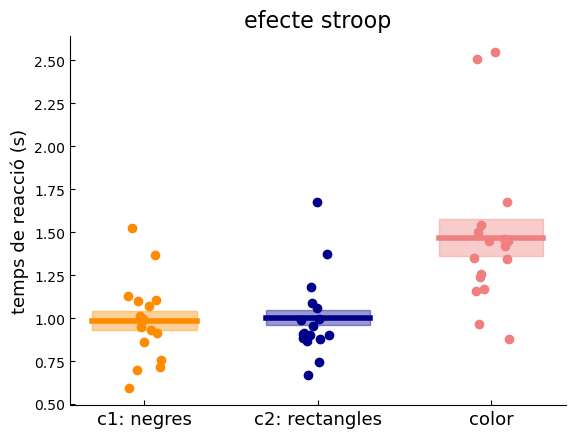

In [12]:
###

idxs_x = [0,1,2]
palette=['darkorange', 'darkblue', 'lightcoral']
cis = [ci_pn, ci_r, ci_pc]
means = [m_pn, m_r, m_pc]

for idx, cond in enumerate(['palabra negra (C1)', 'rectangulo (C2)', 'palabra color (E)']):
    
    ##plot_rectange
    plt.gca().add_patch(Rectangle((idx, cis[idx][0]), 0.6, cis[idx][1]-cis[idx][0], 
                                  alpha=0.4, fill=True, facecolor=palette[idx],
                                  linewidth=1,  edgecolor=palette[idx]))  
    ##plot_mean
    plt.plot([idx, idx+0.6], [means[idx], means[idx]], color=palette[idx], linewidth=4) 
    
    ##
    subj_values = df_simple[cond].values
    for i in range(len(subj_values)):
        jitter=np.random.uniform(-0.1, 0.1)
        plt.plot(idx+0.3+jitter, subj_values[i], color=palette[idx], marker='o', markersize=6 )
    


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xticks([0+0.3,1+0.3,2+0.3], ['c1: negres', 'c2: rectangles', 'color'], fontsize=13)
plt.xlabel('')
plt.ylabel('temps de reacció (s)', fontsize=13)
plt.yticks(fontsize=10)
plt.title('efecte stroop', fontsize=16)
#plt.ylim(0.5, 1.5);
plt.show(block=False)

### historgram trials

C:\Users\david\AppData\Local\Temp\ipykernel_3308\755042866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(data.loc[data['condition']=='palabra_negra', 'rt']),  color='darkorange', bins=np.linspace(0,3,60),
C:\Users\david\AppData\Local\Temp\ipykernel_3308\755042866.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

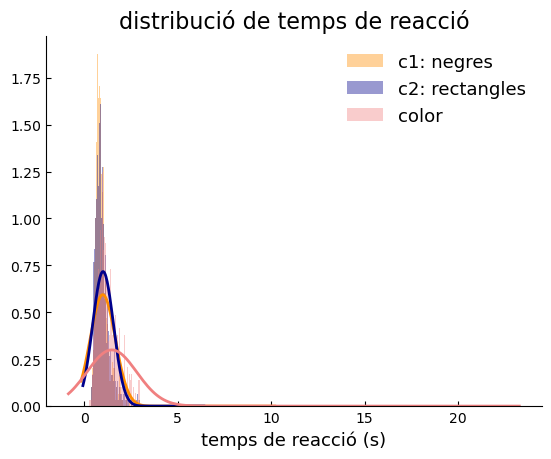

In [13]:
sns.distplot(list(data.loc[data['condition']=='palabra_negra', 'rt']),  color='darkorange', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'darkorange', 'linewidth':2}, label='c1: negres')

sns.distplot(list(data.loc[data['condition']=='rectangulo', 'rt']),  color='darkblue', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'darkblue', 'linewidth':2}, label='c2: rectangles' )

sns.distplot(list(data.loc[data['condition']=='palabra_color', 'rt']),  color='lightcoral', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'lightcoral', 'linewidth':2}, label='color' )

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc=1, frameon=False, prop={'size': 13})
plt.xlabel('temps de reacció (s)', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.title('distribució de temps de reacció', fontsize=16)
plt.show(block=False)


# Stats

In [27]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [28]:
df_stats = df.copy()
df_stats['condition']= df_stats['condition'].replace(['palabra_negra', 'rectangulo', 'palabra_color'], ['control 1', 'control 2', 'test'])



#### Anova + multiple comparisons (simple)
##### The correct Anova should be paired

In [29]:
df_stats

,index,condition,negra.rt,rect.rt,color.rt,participant,rt
0,0,control 1,0.643,0,0,Pilar Bestue,0.643
1,1,control 1,0.41,0,0,Pilar Bestue,0.41
2,2,control 1,0.401,0,0,Pilar Bestue,0.401
3,3,control 1,0.671,0,0,Pilar Bestue,0.671
4,4,control 1,0.74,0,0,Pilar Bestue,0.74
...,...,...,...,...,...,...,...
100,100,test,0,0,1.526,Pilar Bestue,1.526
101,101,test,0,0,1.168,Pilar Bestue,1.168
102,102,test,0,0,1.06,Pilar Bestue,1.06
103,103,test,0,0,1.01,Pilar Bestue,1.01


In [30]:
import statsmodels.formula.api as smf

In [31]:
df_stats['rt'] = pd.to_numeric(df_stats['rt'])

mod = smf.ols(formula='rt ~ condition', data=df_stats).fit()


aov_table = sm.stats.anova_lm(mod, typ=2)

print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')



####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_stats.rt.values, groups=df_stats['condition'].values,  alpha=0.05)
print( tukey.summary()    )
print( '                                 ')
print( '                                ')

                                 
                                 Anova Table
             sum_sq     df          F    PR(>F)
condition  1.526404    2.0  10.246569  0.000088
Residual   7.597334  102.0        NaN       NaN
                                 
                                 
                                 
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
control 1 control 2   0.0754 0.4821 -0.0797 0.2306  False
control 1      test    0.285 0.0001  0.1298 0.4402   True
control 2      test   0.2096  0.005  0.0544 0.3647   True
---------------------------------------------------------
                                 
                                


In [32]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     10.25
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           8.81e-05
Time:                        21:37:53   Log-Likelihood:                -11.115
No. Observations:                 105   AIC:                             28.23
Df Residuals:                     102   BIC:                             36.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### regression (subjects random intercepts - complex)

In [33]:
resultados = smf.mixedlm(formula='rt ~ condition', data=df_stats, groups=df_stats['participant']).fit()
print(resultados.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    rt      
No. Observations:    105        Method:                REML    
No. Groups:          1          Scale:                 0.0745  
Min. group size:     105        Log-Likelihood:        -17.6088
Max. group size:     105        Converged:             Yes     
Mean group size:     105.0                                     
---------------------------------------------------------------
                       Coef. Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept              0.592    0.277 2.140 0.032  0.050  1.135
condition[T.control 2] 0.075    0.065 1.156 0.248 -0.052  0.203
condition[T.test]      0.285    0.065 4.369 0.000  0.157  0.413
Group Var              0.074                                   



C:\Users\david\anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
